In [1]:
#Importing dependencises 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base= pd.read_csv('C:\cardio_base.csv')

In [3]:
base

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


In [4]:
#Data Exploration

In [5]:
base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [6]:
base.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0
69999,99999,20540,1,170,72.0,120,80,2,0


In [7]:
base.shape

(70000, 9)

In [8]:
base.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke'],
      dtype='object')

In [9]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [10]:
base.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [11]:
#Check missing values
base.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64

In [12]:
#Data Visualization

In [14]:
for c in base.columns:
    n = base[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(base[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------


In [15]:
#Age with highest weight

In [16]:
base.groupby('weight')['age'].mean()

weight
10.0     18804.000000
11.0     21582.000000
21.0     21855.000000
22.0     20408.000000
23.0     23284.000000
             ...     
178.0    18301.333333
180.0    17556.500000
181.0    19630.000000
183.0    20939.000000
200.0    15941.000000
Name: age, Length: 287, dtype: float64

In [17]:
#Gender with the highest height

In [18]:
base.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [19]:
#To investigate which gender smoke most

In [20]:
base.groupby('smoke')['gender'].mean()

smoke
0    1.299447
1    1.868212
Name: gender, dtype: float64

In [21]:
# Age which smoke alot. 

In [22]:
base.groupby('smoke')['age'].median() / 365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [23]:
base.groupby('cholesterol')['age'].mean()

cholesterol
1    19283.308084
2    19604.875799
3    20512.962311
Name: age, dtype: float64

In [26]:
base.groupby('gender')['cholesterol'].mean()

gender
1    1.384735
2    1.333633
Name: cholesterol, dtype: float64

In [28]:
base['age_years'] = (base['age'] / 365.25).round().astype('int')

In [29]:
base['age_years'].max()

65

In [30]:
base['age_years'].min()

30

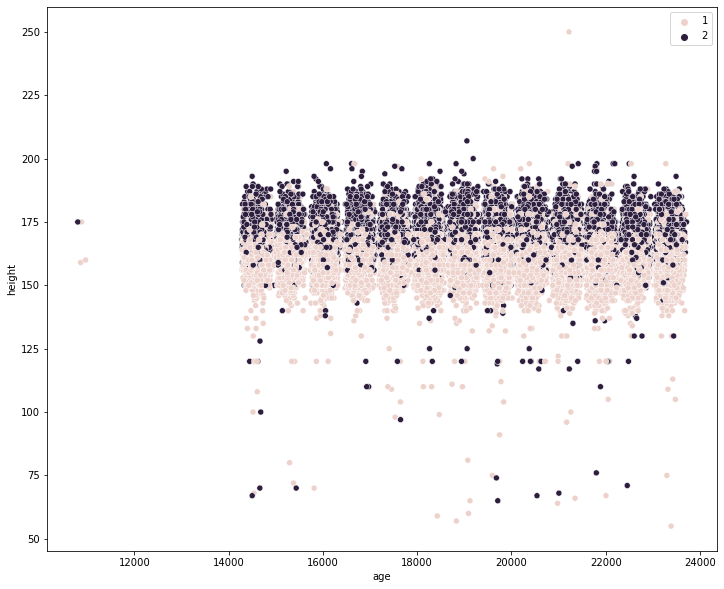

In [31]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=base, x='age', y='height', hue='gender')
plt.legend()

C:\Users\Ken Bwire\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


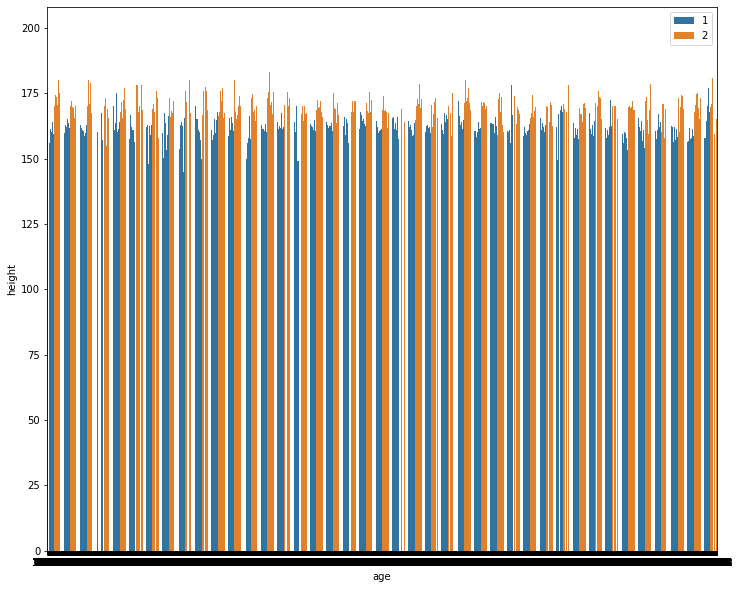

In [58]:
plt.figure(figsize=(12, 10))
sns.barplot(data=base, x='age', y='height', hue='gender', ci=False)
plt.legend()